# Business Understanding

## Global Alzheimer Situation 

- More than **55 million** people worldwide are currently living with Alzheimer’s or other forms of dementia. As the global population continues to age, the number of cases will rise to **152 million** by 2050.

- Already, Alzheimer’s and other dementias impose a **1.3 trillion** annual cost – expected to soar to **2.8 trillion** by 2050. 

- Healthcare systems worldwide are not prepared to treat and care for today’s population of people living with Alzheimer’s, much less the growing wave of patients to come.

- Globally, three out of every four people with dementia are never even diagnosed, much less treated.

[Driving a global effort against Alzheimer’s](https://www.weforum.org/impact/alzheimers-disease/#:~:text=More%20than%2055%20million%20people%20worldwideare%20currently%20living,their%20memories%2C%20their%20cognitive%20abilities%20and%20their%20independence.)。

## China Alzheimer Situation

- China has become the country with the largest number of patients with AD in the world, with nearly **10 million** patients. The number of cases will rise to **28 million** by 2050.
- AD and related dementias are the fifth leading cause of death in China. They have become one of the diseases with the most expensive medical costs, the deadliest and the heaviest care burden. The direct economic burden in China in 2030, 2040 and 2050 will respectively reach 1.0 trillion, 1.7 trillion and **2.5 trillion yuan**.

[2023 中国阿尔茨海默病数据与防控策略](http://www.caad.org.cn/art/2024/1/23/art_44_346496.html)。

## Reason

The situation serves as a clarion call highlighting the urgent need for action in the face of Alzheimer’s disease, which is set to escalate dramatically worldwide, outpacing current healthcare capabilities and imposing a staggering economic burden. As the disease burden swells, with a significant majority undiagnosed, it underscores the critical necessity for robust healthcare planning, investment in research, and global efforts to prepare for and combat this public health challenge.

## What can our model do?

### Goal: What factors affect elderly’s Alzheimer most?

- Tailored Healthcare Services: Recognizing the factors that contribute to Alzheimer's can enable healthcare providers to offer more personalized care. This approach ensures that interventions and support systems are designed to meet the unique needs of individuals, potentially slowing the progression of the disease or improving the quality of life for those affected.

- Policy Formulation: Insights into the predominant factors linked to Alzheimer’s disease can inform policymakers. This information is critical for developing comprehensive healthcare policies that bolster support and resources for at-risk populations, ensuring they have access to necessary diagnostic, treatment, and care services.

- Resource Distribution: An understanding of Alzheimer's influencing factors can guide the equitable distribution of healthcare resources. This strategic allocation ensures that communities, particularly those with higher concentrations of at-risk individuals, are adequately equipped to manage and mitigate the impact of Alzheimer's.

- Preventive Strategies: Knowledge of the risk factors associated with Alzheimer's can lead to the development of targeted preventive measures. By focusing on modifiable risk factors, healthcare providers can recommend lifestyle changes and interventions that may reduce the risk of developing Alzheimer's, thereby having a significant impact on public health outcomes.

- Educational Programs: Findings on Alzheimer's risk factors can shape the content and focus of educational campaigns. These programs can raise awareness about the disease, its risk factors, and preventive measures, empowering individuals to make informed health and lifestyle decisions.

- Research Focus: Understanding which factors are most influential in the development of Alzheimer's can steer research efforts toward investigating these areas more deeply. This focused research approach has the potential to uncover novel insights and interventions that could contribute significantly to the global fight against Alzheimer's disease.

# Data Understanding

## Importing Data

In [1]:
import pandas as pd 
import numpy as np
from fancyimpute import KNN 

In [2]:
df = pd.read_excel('./original_data.xlsx')
df

id        alb    bun   cho  crea      crphs   glu        gsp  \
0     32160008  48.200001   4.32  5.51    68   0.250000  4.24  221.39999   
1     32160108  34.500000   9.94  3.75    93   0.990000  3.18  180.89999   
2     32160908  43.700001   8.00  3.25   119   6.770000  4.01  244.80000   
3     32161008  41.799999  14.57  4.12   151  49.900002  3.86  242.10001   
4     32161408  36.900002   4.17  3.98    55   6.410000  3.92  202.50000   
...        ...        ...    ...   ...   ...        ...   ...        ...   
2146  46104112  37.299999   5.16  4.98    68   0.250000  3.11  215.80000   
2147  46104212  31.600000   6.47  3.29   102  21.360001  5.21  195.39999   
2148  46104312  43.000000   4.00  3.60    71   3.950000  2.88  231.80000   
2149  46104412  37.900002   4.80  4.57    74   1.900000  1.82  220.30000   
2150  46104512  38.700001   5.10  3.52    91   1.880000  8.86  233.60001   

      hdlc  ldlc  ...  ci  handneck  handback  standup  pickup  hear  cancer  \
0     1.05  3.66  ...  16       3.0       3.0      1.0     1.0   1.0       3   
1     1.30  2.28  ...  30       3.0       3.0      1.0     1.0   1.0       3   
2     0.83  2.04  ...  30       3.0       3.0      1.0     1.0   1.0       3   
3     1.19  2.51  ...  30       3.0       3.0      1.0     2.0   1.0       3   
4     0.79  2.64  ...  30       3.0       3.0      1.0     1.0   3.0       3   
...    ...   ...  ...  ..       ...       ...      ...     ...   ...     ...   
2146  1.15  3.45  ...  23       3.0       3.0      2.0     1.0   3.0       3   
2147  1.28  1.66  ...  27       3.0       3.0      2.0     1.0   1.0       3   
2148  1.32  1.93  ...  23       3.0       3.0      1.0     1.0   1.0       3   
2149  1.41  2.90  ...  23       3.0       3.0      2.0     1.0   1.0       3   
2150  1.20  2.04  ...  29       3.0       3.0      1.0     1.0   1.0       3   

      din1  din3  din5  
0        0     0     0  
1        0     0     9  
2        0     0     9  
3        0     0     0  
4        0     0     0  
...    ...   ...   ...  
2146     9     9     9  
2147     9     9     9  
2148     0     0     0  
2149     0     0     0  
2150     9     9     9  

[2151 rows x 87 columns]

## Feature Understanding

### To analyze the possible links and effects of different variables on dementia in the elderly:

1. Demographic Factors

Factors such as **place of residence**, **age**, **gender** and **level of education** have a significant impact on the risk of dementia. For instance, age is the most substantial risk factor for dementia, while individuals with higher levels of education may have a reduced risk due to their stronger cognitive reserve.

2. Lifestyle Choices

Healthy lifestyle factors such as **diet**(drinking, fruit, egg, meat, sugar…), **physical activity**, **non-smoking**, and **limiting alcohol** consumption are associated with a reduced risk of dementia. These factors can indirectly decrease the incidence of dementia by reducing the risk of cardiovascular diseases.

3. Leisure Activities

Engaging in cognitively stimulating activities and social interactions can keep the brain active, which helps in delaying cognitive decline. Regular **leisure activities** are considered an effective means to enhance cognitive reserve and prevent dementia.

4. Mental Health

**Psychological health conditions**, such as depression and anxiety, are associated with cognitive decline. Depression, in particular, is viewed as a risk factor for dementia among the elderly, possibly due to its connection with biochemical changes in the brain.

5. Health Monitoring

Regular physical examinations, including the measurement of **weight** and **blood pressure**, are crucial for identifying health issues that may increase the risk of dementia. Cardiovascular health directly affects the blood supply to the brain, thereby influencing cognitive health.

6. Biomarkers

Biomarkers, such as specific **proteins in the blood** or **25-oh-vitamind3**, can be used for early detection of dementia and monitoring its progression. Analyzing the relationship between biomarkers and the diagnosis of dementia can reveal early biological indicators of dementia, providing a basis for early diagnosis and treatment.

7. Disease Detection

The presence of chronic conditions like **diabetes**, **heartdisease**, or **cancer** increases dementia risk by affecting cardiovascular health and brain circulation. Managing these diseases can help mitigate dementia risk.

## Label Understanding

### CI
is the score of **MMSE**(Mini-Mental State Examination) score includes tests of several cognitive functions such as orientation, naming (e.g., of food items), registration, attention and calculation, visual construction, recall, and language. These tests cover various aspects from memory to language comprehension. The higher the MMSE score, the better the individual's cognitive function. The MMSE score ranges from 0 to 30 points, with higher scores representing better cognitive function.

It is important to note that if more than three items are missing in the test, the assessment will be defined as missing data. This situation represents a very small proportion of the sample, about 0.04%.

Additionally, determining whether an elderly person has dementia is related to their level of education, based on the criteria provided above. The conditions for judging an elderly person as having dementia are as follows: **illiterate and scoring less than 17 points, elementary education and scoring less than 20 points, and secondary education or higher scoring less than 24 points.**

In other cases, the individual is considered not to have dementia, thereby creating a new variable 'dementia_status' (1 for **dementia**, 0 for **non-dementia**).

## Visualization


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

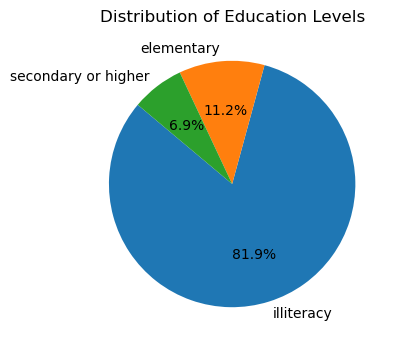

In [4]:
edu_ranges = ['illiteracy', 'elementary', 'secondary or higher']
edu_counts = [
    df[df['edu'] < 6].shape[0],
    df[(df['edu'] >= 6) & (df['edu'] <= 8)].shape[0],
    df[df['edu'] > 8].shape[0]
]

plt.figure(figsize=(7, 4))
plt.pie(edu_counts, labels=edu_ranges, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Education Levels')
plt.show()

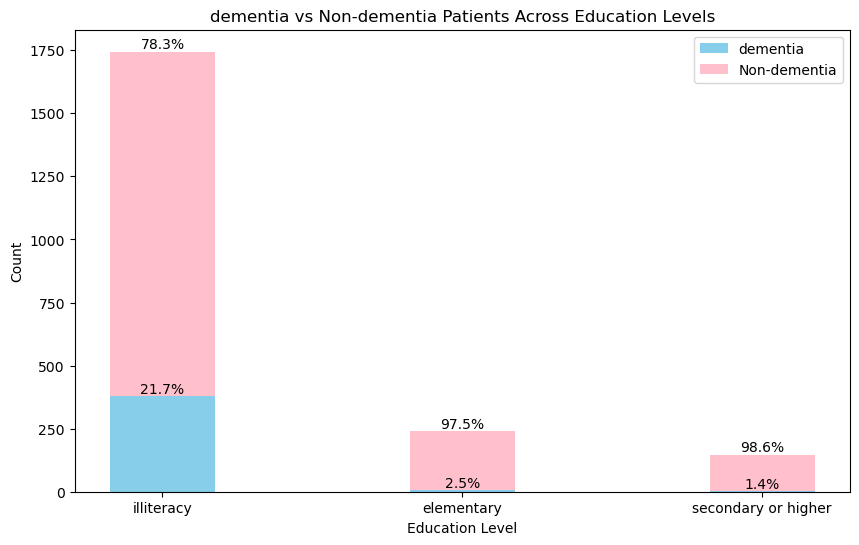

In [13]:
ad_counts = [
    df[(df['edu'] < 6) & (df['ci'] < 17)].shape[0],
    df[(df['edu'] >= 6) & (df['edu'] <= 8) & (df['ci'] < 20)].shape[0],
    df[(df['edu'] > 8) & (df['ci'] < 24)].shape[0]
]

non_ad_counts = [
    df[(df['edu'] < 6) & (df['ci'] >= 17)].shape[0],
    df[(df['edu'] >= 6) & (df['edu'] <= 8) & (df['ci'] >= 20)].shape[0],
    df[(df['edu'] > 8) & (df['ci'] >= 24)].shape[0]
]

edu_ranges = ['illiteracy', 'elementary', 'secondary or higher']

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(edu_ranges))

totals = [ad + non_ad for ad, non_ad in zip(ad_counts, non_ad_counts)]

ad_proportions = [ad / total for ad, total in zip(ad_counts, totals)]
non_ad_proportions = [non_ad / total for non_ad, total in zip(non_ad_counts, totals)]

plt.bar(index, ad_counts, bar_width, color='skyblue', label='dementia')

plt.bar(index, non_ad_counts, bar_width, bottom=ad_counts, color='pink', label='Non-dementia')

for i in index:
    if ad_counts[i] > 0:  
        plt.text(i, ad_counts[i], f'{ad_proportions[i]:.1%}', ha='center', va='bottom', color='black')
    if non_ad_counts[i] > 0:  
        plt.text(i, ad_counts[i] + non_ad_counts[i], f'{non_ad_proportions[i]:.1%}', ha='center', va='bottom', color='black')
    
plt.legend()

plt.title('dementia vs Non-dementia Patients Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

plt.xticks(index, edu_ranges)

plt.show()

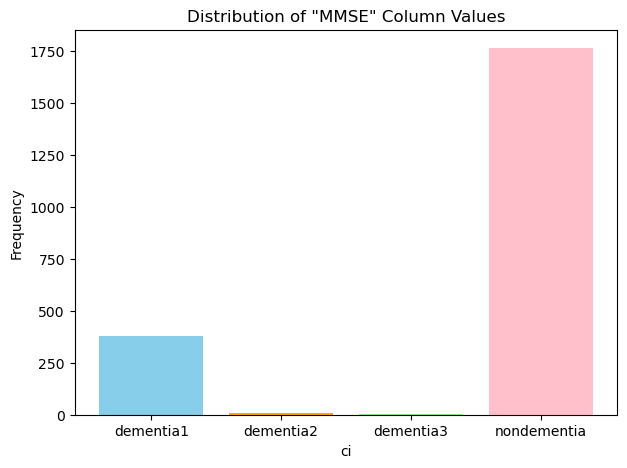

In [5]:
ranges = ['dementia1', 'dementia2', 'dementia3', 'nondementia']
counts = [0, 0, 0, 0] 

# Calculate the number of each range
counts[0] = df[(df['edu'] < 6) & (df['ci'] < 17)].shape[0]
counts[1] = df[(df['edu'] >= 6) & (df['edu'] <= 8) & (df['ci'] < 20)].shape[0]
counts[2] = df[(df['edu'] > 8) & (df['ci'] < 24)].shape[0]
counts[3] = df.shape[0] - (counts[0] + counts[1] + counts[2])


# Creating a bar chart
plt.figure(figsize=(7, 5))  # Adjust the figure size as needed
plt.bar(ranges, counts, color=['skyblue', 'orange', 'lightgreen', 'pink'])

plt.title('Distribution of "MMSE" Column Values')  # Title of the bar chart
plt.xlabel('ci')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis

plt.show()

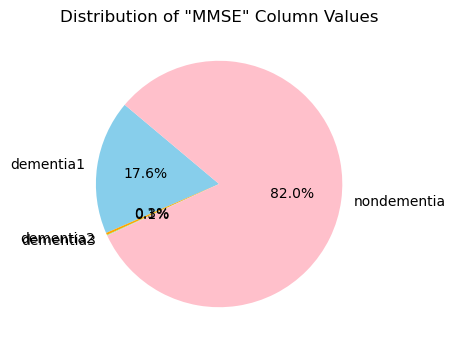

In [6]:
ranges = ['dementia1', 'dementia2', 'dementia3', 'nondementia']
counts = [0, 0, 0, 0] 

# Calculate the number of each range
counts[0] = df[(df['edu'] < 6) & (df['ci'] < 17)].shape[0]
counts[1] = df[(df['edu'] >= 6) & (df['edu'] <= 8) & (df['ci'] < 20)].shape[0]
counts[2] = df[(df['edu'] > 8) & (df['ci'] < 24)].shape[0]
counts[3] = df.shape[0] - (counts[0] + counts[1] + counts[2])

# Create a pie chart
plt.figure(figsize=(7, 4))  # Adjust the figure size as needed
plt.pie(counts, labels=ranges, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'pink'])

plt.title('Distribution of "MMSE" Column Values')  # Title of the pie chart
plt.show()

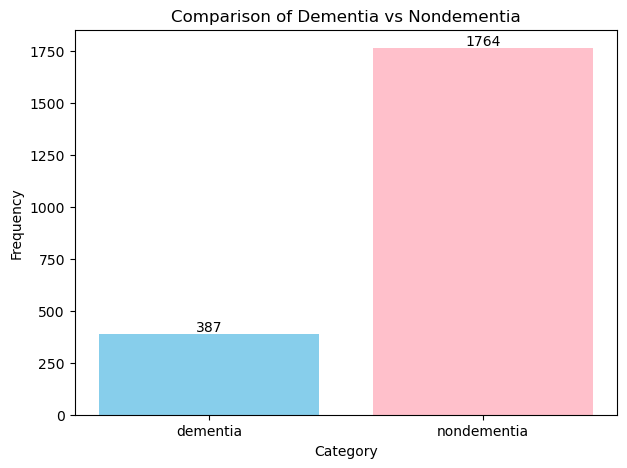

In [7]:
import matplotlib.pyplot as plt

counts_dementia = [counts[0], counts[1], counts[2]]

total_dementia = sum(counts_dementia)

total_nondementia = counts[3]

categories = ['dementia', 'nondementia']
totals = [total_dementia, total_nondementia]

plt.figure(figsize=(7, 5))
bars = plt.bar(categories, totals, color=['skyblue', 'pink'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.title('Comparison of Dementia vs Nondementia')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.show()

# Data Preparation

## Preprocessing

In [8]:
# check the null value of each column

for i in df.columns:
    if df[i].isnull().values.any() == True:
        print(f'column {i} contains nan value', df[i].isnull().value_counts()[1])

column sod contains nan value 11
column vd3 contains nan value 10
column mda contains nan value 10
column ualb contains nan value 199
column ucr contains nan value 199
column ualbbyucr contains nan value 199
column wbc contains nan value 66
column lymph contains nan value 69
column lymph_a contains nan value 70
column rbc contains nan value 69
column hgb contains nan value 66
column hct contains nan value 87
column mcv contains nan value 68
column mch contains nan value 68
column mchc contains nan value 70
column plt contains nan value 65
column mpv contains nan value 105
column pdw contains nan value 105
column pct contains nan value 134
column coresidence contains nan value 18
column edu contains nan value 21
column marital contains nan value 6
column weight contains nan value 62
column smkl contains nan value 28
column dril contains nan value 15
column pa contains nan value 37
column diseasetime contains nan value 36
column hypertension contains nan value 44
column diabetes contains

In [9]:
# 'ulcer ' and 'bedsore' have too much missing value

df = df.drop(columns = {'id', 'ulcer', 'bedsore'})

# column edu contains nan value 21
df = df.dropna(subset=['edu'])

In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
MM_scaler = MinMaxScaler()
df_scaled = MM_scaler.fit_transform(df)

# impute with missing data
df_filled_scaled = KNN(k=5).fit_transform(df_scaled)

# change the scaled data back to normal data using trained scaler MM (numpy data) 
df_filled = MM_scaler.inverse_transform(df_filled_scaled)

Imputing row 1/2130 with 0 missing, elapsed time: 1.271
Imputing row 101/2130 with 5 missing, elapsed time: 1.275
Imputing row 201/2130 with 2 missing, elapsed time: 1.279
Imputing row 301/2130 with 1 missing, elapsed time: 1.283
Imputing row 401/2130 with 0 missing, elapsed time: 1.284
Imputing row 501/2130 with 1 missing, elapsed time: 1.288
Imputing row 601/2130 with 1 missing, elapsed time: 1.293
Imputing row 701/2130 with 13 missing, elapsed time: 1.297
Imputing row 801/2130 with 2 missing, elapsed time: 1.300
Imputing row 901/2130 with 1 missing, elapsed time: 1.304
Imputing row 1001/2130 with 1 missing, elapsed time: 1.309
Imputing row 1101/2130 with 1 missing, elapsed time: 1.313
Imputing row 1201/2130 with 1 missing, elapsed time: 1.316
Imputing row 1301/2130 with 1 missing, elapsed time: 1.317
Imputing row 1401/2130 with 1 missing, elapsed time: 1.321
Imputing row 1501/2130 with 1 missing, elapsed time: 1.323
Imputing row 1601/2130 with 1 missing, elapsed time: 1.329
Imputing

In [11]:
# change the numpy data back to pandas with column name

column_list = []
for i in df.columns:
    column_list.append(i)
new_df_filled = pd.DataFrame(np.around(df_filled ,2), columns = column_list)
df = new_df_filled
df

alb    bun   cho   crea  crphs   glu    gsp  hdlc  ldlc    tg  ...  \
0     48.2   4.32  5.51   68.0   0.25  4.24  221.4  1.05  3.66  1.76  ...   
1     34.5   9.94  3.75   93.0   0.99  3.18  180.9  1.30  2.28  0.37  ...   
2     43.7   8.00  3.25  119.0   6.77  4.01  244.8  0.83  2.04  0.83  ...   
3     41.8  14.57  4.12  151.0  49.90  3.86  242.1  1.19  2.51  0.92  ...   
4     36.9   4.17  3.98   55.0   6.41  3.92  202.5  0.79  2.64  1.22  ...   
...    ...    ...   ...    ...    ...   ...    ...   ...   ...   ...  ...   
2125  37.3   5.16  4.98   68.0   0.25  3.11  215.8  1.15  3.45  0.84  ...   
2126  31.6   6.47  3.29  102.0  21.36  5.21  195.4  1.28  1.66  0.77  ...   
2127  43.0   4.00  3.60   71.0   3.95  2.88  231.8  1.32  1.93  0.78  ...   
2128  37.9   4.80  4.57   74.0   1.90  1.82  220.3  1.41  2.90  0.58  ...   
2129  38.7   5.10  3.52   91.0   1.88  8.86  233.6  1.20  2.04  0.62  ...   

        ci  handneck  handback  standup  pickup  hear  cancer  din1  din3  \
0     16.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
1     30.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
2     30.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
3     30.0       3.0       3.0      1.0     2.0   1.0     3.0   0.0   0.0   
4     30.0       3.0       3.0      1.0     1.0   3.0     3.0   0.0   0.0   
...    ...       ...       ...      ...     ...   ...     ...   ...   ...   
2125  23.0       3.0       3.0      2.0     1.0   3.0     3.0   9.0   9.0   
2126  27.0       3.0       3.0      2.0     1.0   1.0     3.0   9.0   9.0   
2127  23.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
2128  23.0       3.0       3.0      2.0     1.0   1.0     3.0   0.0   0.0   
2129  29.0       3.0       3.0      1.0     1.0   1.0     3.0   9.0   9.0   

      din5  
0      0.0  
1      9.0  
2      9.0  
3      0.0  
4      0.0  
...    ...  
2125   9.0  
2126   9.0  
2127   0.0  
2128   0.0  
2129   9.0  

[2130 rows x 84 columns]

## Data Group

**illiterate and scoring less than 17 points, elementary education and scoring less than 20 points, and secondary education or higher scoring less than 24 points.**

In [12]:
import pandas as pd

# Define a function to categorize education
def categorize_education(years):
    if years < 6:
        return 0 # Illiterate
    elif 6 <= years <= 8:
        return 1  # Elementary
    else:
        return 2  # Above Middle School

# Apply the function to the 'edu' column
df['edu_category'] = df['edu'].apply(categorize_education)

edu_percentages = df['edu_category'].value_counts(normalize=True) * 100

edu_percentages = edu_percentages.round(1).astype(str) + '%'
print(edu_percentages)

0    81.9%
1    11.2%
2     6.9%
Name: edu_category, dtype: object


In [13]:
df['dementia_status'] = (
    ((df['edu_category'] == 0) & (df['ci'] < 17)) |
    ((df['edu_category'] == 1) & (df['ci'] < 20)) |
    ((df['edu_category'] == 2) & (df['ci'] < 24))
).map({True: 1, False: 0})

dementia_status = df['dementia_status'].value_counts(normalize=True) * 100

dementia_status = dementia_status.round(1).astype(str) + '%'
print(dementia_status)

0    81.8%
1    18.2%
Name: dementia_status, dtype: object


## Data Split

In [14]:
X = df.drop(columns = {'ci','edu', 'edu_category', 'dementia_status'}, axis=1)

X

alb    bun   cho   crea  crphs   glu    gsp  hdlc  ldlc    tg  ...  \
0     48.2   4.32  5.51   68.0   0.25  4.24  221.4  1.05  3.66  1.76  ...   
1     34.5   9.94  3.75   93.0   0.99  3.18  180.9  1.30  2.28  0.37  ...   
2     43.7   8.00  3.25  119.0   6.77  4.01  244.8  0.83  2.04  0.83  ...   
3     41.8  14.57  4.12  151.0  49.90  3.86  242.1  1.19  2.51  0.92  ...   
4     36.9   4.17  3.98   55.0   6.41  3.92  202.5  0.79  2.64  1.22  ...   
...    ...    ...   ...    ...    ...   ...    ...   ...   ...   ...  ...   
2125  37.3   5.16  4.98   68.0   0.25  3.11  215.8  1.15  3.45  0.84  ...   
2126  31.6   6.47  3.29  102.0  21.36  5.21  195.4  1.28  1.66  0.77  ...   
2127  43.0   4.00  3.60   71.0   3.95  2.88  231.8  1.32  1.93  0.78  ...   
2128  37.9   4.80  4.57   74.0   1.90  1.82  220.3  1.41  2.90  0.58  ...   
2129  38.7   5.10  3.52   91.0   1.88  8.86  233.6  1.20  2.04  0.62  ...   

      leisure  handneck  handback  standup  pickup  hear  cancer  din1  din3  \
0         7.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
1        11.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
2        11.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
3        10.0       3.0       3.0      1.0     2.0   1.0     3.0   0.0   0.0   
4        10.0       3.0       3.0      1.0     1.0   3.0     3.0   0.0   0.0   
...       ...       ...       ...      ...     ...   ...     ...   ...   ...   
2125     11.0       3.0       3.0      2.0     1.0   3.0     3.0   9.0   9.0   
2126      7.0       3.0       3.0      2.0     1.0   1.0     3.0   9.0   9.0   
2127      9.0       3.0       3.0      1.0     1.0   1.0     3.0   0.0   0.0   
2128     10.0       3.0       3.0      2.0     1.0   1.0     3.0   0.0   0.0   
2129     10.0       3.0       3.0      1.0     1.0   1.0     3.0   9.0   9.0   

      din5  
0      0.0  
1      9.0  
2      9.0  
3      0.0  
4      0.0  
...    ...  
2125   9.0  
2126   9.0  
2127   0.0  
2128   0.0  
2129   9.0  

[2130 rows x 82 columns]

In [15]:
y = df['dementia_status']

In [16]:
# Import MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
MM = MinMaxScaler()

# Scale the input features
MX = MM.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(MX, y, test_size=0.30, random_state=5)

## Feature Selection with Understanding

### Univariate Selection

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(MX, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(20,'Score'))

           Specs       Score
77          hear  615.426364
71           adl  408.243840
76        pickup  283.991025
75       standup  215.229070
35        censor  212.843954
39       marital   92.170887
36        gender   64.106031
72       leisure   59.796869
33       trueage   37.321072
43          smkl   30.583207
32    northsouth   21.158304
48   diseasetime   17.118155
34  survival_bas   13.583723
44          dril   12.810326
31          lost    9.250718
12           vd3    7.650245
70        psycho    6.673563
59           veg    6.664139
42        weight    6.015667
60          meat    5.307150


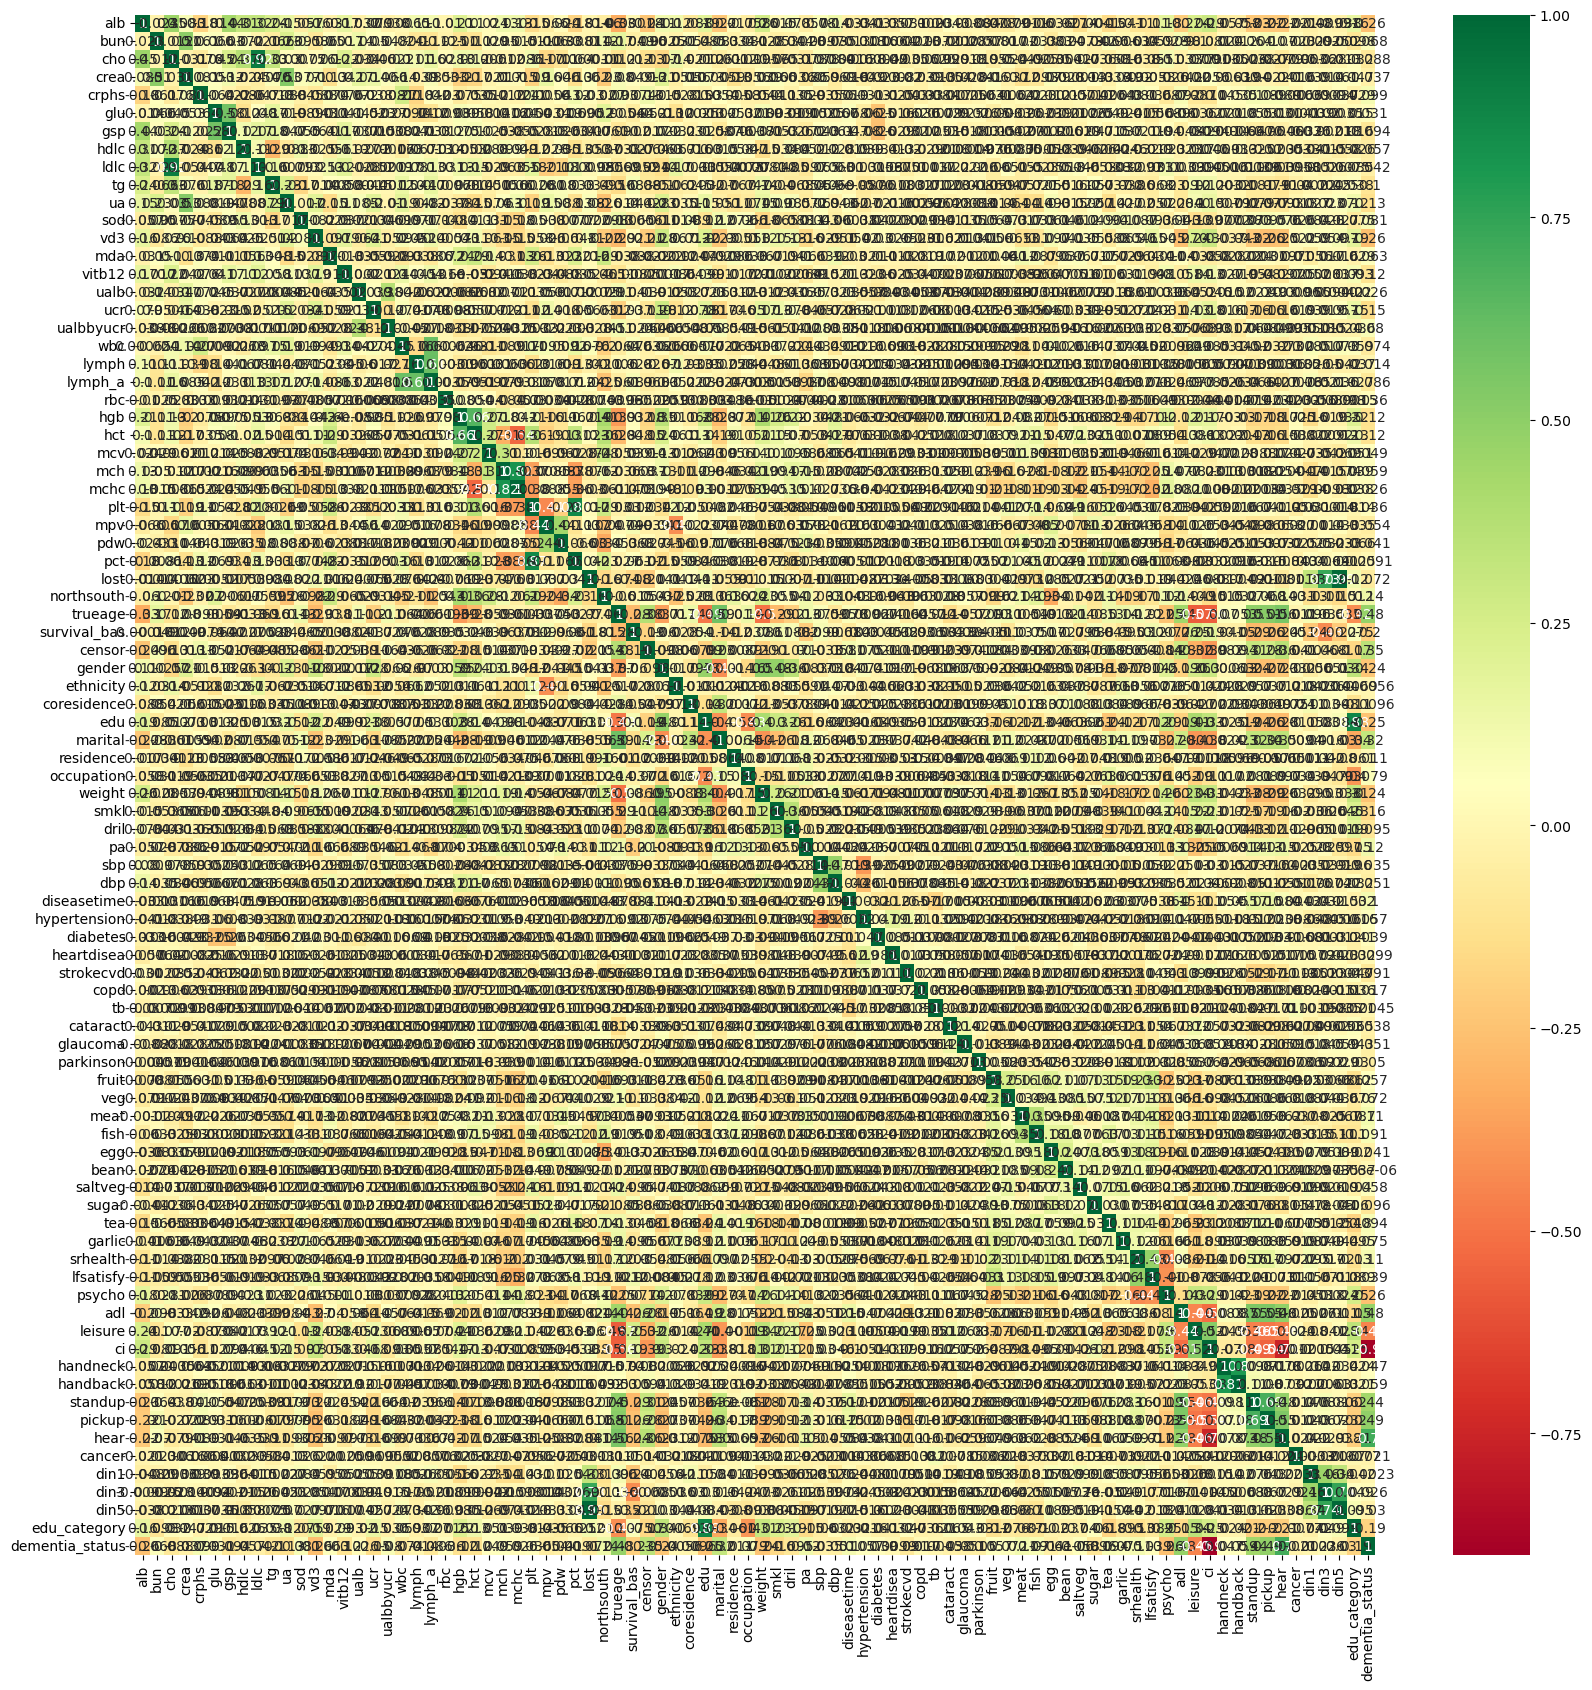

In [19]:
import seaborn as sns

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

### Recursive feature elimination (RFE)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase the number of iterations to ensure convergence

# Initialize the RFE model, with the number of features to select set to 10. 
# This number can be adjusted based on actual conditions.
selector = RFE(estimator=model, n_features_to_select=10, step=1)

# Fit the model with the standardized feature matrix MX and the target variable y
selector = selector.fit(MX, y)

# Output the selected features using the column names of the original DataFrame
selected_features = X.columns[selector.support_]

# Create a DataFrame containing feature names and their rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': selector.ranking_
})

# Sort by ranking in descending order
feature_rankings_sorted = feature_rankings.sort_values('Ranking')

# Output the sorted feature rankings
feature_rankings_sorted.head(20)

Feature  Ranking
0           alb        1
72      leisure        1
33      trueage        1
29          pdw        1
70       psycho        1
61         fish        1
77         hear        1
12          vd3        1
10           ua        1
25          mch        1
13          mda        2
11          sod        3
14       vitb12        4
71          adl        5
6           gsp        6
48  diseasetime        7
3          crea        8
26         mchc        9
60         meat       10
73     handneck       11

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)

# Fit the Random Forest Classifier
rf_classifier.fit(X, y)

# Create a SelectFromModel object, which will be used to select features with importance greater than the mean importance
sfm = SelectFromModel(rf_classifier, threshold='mean')

# Train the SelectFromModel object
sfm.fit(X, y)

# Print the features considered important
selected_features = X.columns[(sfm.get_support())]

# Feature importances
importances = rf_classifier.feature_importances_

# Convert to DataFrame
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances_sorted = feature_importances.sort_values('Importance', ascending=False)

# Print feature importances
feature_importances_sorted.head(20)

Feature  Importance
77          hear    0.172147
33       trueage    0.068245
72       leisure    0.058389
71           adl    0.038731
76        pickup    0.031667
75       standup    0.029303
70        psycho    0.027719
12           vd3    0.027468
35        censor    0.019267
34  survival_bas    0.016485
42        weight    0.016234
0            alb    0.016009
11           sod    0.015408
69     lfsatisfy    0.015171
5            glu    0.014542
28           mpv    0.013392
29           pdw    0.013079
46           sbp    0.013003
27           plt    0.012691
13           mda    0.012575

### Lasso 

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# First, standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the LassoCV object to select the best alpha (regularization strength) using cross-validation
lasso = LassoCV(cv=5, random_state=5)

# Train the LassoCV model
lasso.fit(X_scaled, y)

# Get the features with non-zero coefficients
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected Features from Lasso:", list(selected_features))

# The coefficients of each feature can be examined; their magnitudes and signs indicate the impact and importance of the features for predicting the target variable
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lasso.coef_)
}).sort_values('Importance', ascending=False)

# Print the feature importance
feature_importance.head(20)

Selected Features from Lasso: ['alb', 'gsp', 'ua', 'vd3', 'mda', 'vitb12', 'mch', 'pdw', 'trueage', 'censor', 'gender', 'hypertension', 'meat', 'fish', 'psycho', 'adl', 'leisure', 'pickup', 'hear']


Feature  Importance
77          hear    0.201404
71           adl    0.039960
72       leisure    0.020998
35        censor    0.020766
76        pickup    0.019105
70        psycho    0.018795
0            alb    0.012717
60          meat    0.008194
12           vd3    0.007457
13           mda    0.007182
36        gender    0.006841
61          fish    0.006274
25           mch    0.005085
6            gsp    0.004988
10            ua    0.004789
29           pdw    0.003164
33       trueage    0.002091
49  hypertension    0.001535
14        vitb12    0.001498
50      diabetes    0.000000

### Understanding

hear, ADL, pickup, leisure, trueage, psycho, vd3, smkl all have high relevance under different methods of feature selection.


Hearing (Hearing condition): There is an association between hearing loss and cognitive decline. Hearing impairment can lead to social isolation and communication difficulties, which may accelerate cognitive decline and the development of dementia.

ADL (Activities of Daily Living): The ADL assessment measures a person's ability to perform everyday tasks independently. Patients with Alzheimer's disease often have difficulty with daily living activities, such as dressing, eating, and personal hygiene.

Pickup: If this variable refers to some form of activity involving picking things up or hand dexterity, it may be related to motor coordination and muscle control, which can be impaired in cases of cognitive decline.

Leisure (Total leisure activities): Leisure activities often involve social interaction and cognitive stimulation, which are important for maintaining mental health and cognitive abilities. Active participation in leisure activities is believed to help slow cognitive decline.

TrueAge (Actual age): Age is a significant risk factor for Alzheimer's disease. The risk of dementia increases with age.

Psycho (Psychological well-being): Psychological health status is closely related to cognitive health. Psychological issues, such as depression and anxiety, are associated with cognitive decline and Alzheimer's disease.

VD3 (25-hydroxyvitamin D3): Vitamin D levels are associated with a variety of health issues, including cognitive function. Low levels of vitamin D are thought to be linked to an increased risk of Alzheimer's disease.

Smoking (Smoking status): Smoking is associated with a variety of health issues, including cardiovascular diseases, which are potential risk factors for dementia. Smoking is also thought to directly affect brain health.

# Modelling and Evaluation

In [23]:
from sklearn.metrics import accuracy_score, f1_score

## Baseline Modelling

### XGBoost

In [24]:
# Install the XGBoost library using pip
!pip install xgboost

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=5)
xgb_model.fit(X_train, y_train)

# Use trained models to make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print F1 scores and accuracy
print(f"XGBoost's F1 Score: {f1_score(y_test, y_pred_xgb, average='macro')}")
print(f"XGBoost's Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100}%")

XGBoost's F1 Score: 0.8360030443555524
XGBoost's Accuracy: 90.92331768388107%


### SVM

In [26]:
from sklearn.svm import SVC

svm_model = SVC(random_state=5)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(f"SVM's F1 Score: {f1_score(y_test, y_pred_svm, average='macro')}")
print(f"SVM's Accuracy: {accuracy_score(y_test, y_pred_svm) * 100}%")

SVM's F1 Score: 0.8372303422106668
SVM's Accuracy: 90.92331768388107%


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=5)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print(f"Decision Tree's F1 Score: {f1_score(y_test, y_pred_dt, average='macro')}")
print(f"Decision Tree's Accuracy: {accuracy_score(y_test, y_pred_dt) * 100}%")

Decision Tree's F1 Score: 0.779610686766042
Decision Tree's Accuracy: 87.16744913928012%


### Neural Network Modelling

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', 
                               solver='adam', random_state=5)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Use the model to make predictions
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate and print the F1 score and accuracy
print(f"Neural Network's F1 Score: {f1_score(y_test, y_pred_mlp, average='macro')}")
print(f"Neural Network's Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100}%")

Neural Network's F1 Score: 0.8251497370101243
Neural Network's Accuracy: 90.14084507042254%


### F-score Average value

In [29]:
print("Average of F1 Score:", (0.8360030443555524 + 0.8372303422106668 + 0.779610686766042 + 0.8251497370101243) / 4)

Average of F1 Score: 0.8194984525855963


## ExtraTreesClassifier selects the 50 most relevant features

### Data preparation and split

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np

# Initialize ExtraTreesClassifier
model = ExtraTreesClassifier()

# Train the model
model.fit(MX, y)

# Get feature importances
importances = model.feature_importances_

# Since MX was converted from a DataFrame, we use X.columns to get feature names
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])

# Sort the feature importances
sorted_features = feature_importances.sort_values(by="Importance", ascending=False)

# Select the top 50 most important features
top_50 = sorted_features.head(50)

print(top_50)

              Importance
hear            0.199811
adl             0.063424
pickup          0.061819
leisure         0.038302
standup         0.032941
trueage         0.031780
censor          0.027059
marital         0.023586
psycho          0.015414
gender          0.011967
northsouth      0.011336
survival_bas    0.010703
lfsatisfy       0.010674
vd3             0.010654
srhealth        0.009780
weight          0.009773
pdw             0.009393
alb             0.009184
mpv             0.009116
meat            0.008923
mch             0.008898
lymph           0.008700
vitb12          0.008588
sbp             0.008437
sod             0.008370
hdlc            0.008364
glu             0.008314
mda             0.008300
ualbbyucr       0.008191
mchc            0.008152
crea            0.008108
ua              0.008078
gsp             0.008058
wbc             0.007973
sugar           0.007970
bun             0.007962
saltveg         0.007947
plt             0.007944
rbc             0.007939


In [31]:
# Get the names of the top 50 features from X_50
top_50_features = top_50.index.tolist()

# Use these feature names to select the corresponding columns from the original DataFrame X
X_50 = X[top_50_features]

# Now, X_50 is a new DataFrame that only contains the top 50 most important features
X_50.head()

hear  adl  pickup  leisure  standup  trueage  censor  marital  psycho  \
0   1.0  0.0     1.0      7.0      1.0     90.0     0.0      2.0    26.0   
1   1.0  0.0     1.0     11.0      1.0     91.0     0.0      1.0    29.0   
2   1.0  0.0     1.0     11.0      1.0     81.0     0.0      2.0    26.0   
3   1.0  0.0     2.0     10.0      1.0     90.0     0.0      2.0    29.0   
4   3.0  0.0     1.0     10.0      1.0    100.0     1.0      2.0    28.0   

   gender  ...   pct     ucr   mcv  ldlc  lymph_a  handback    hgb    tg  \
0     0.0  ...  0.19   54.96  82.5  3.66      2.5       3.0  111.0  1.76   
1     1.0  ...  0.14  152.11  88.6  2.28      0.9       3.0  124.0  0.37   
2     0.0  ...  0.17   50.80  83.0  2.04      1.4       3.0  100.0  0.83   
3     0.0  ...  0.19   43.89  84.7  2.51      1.3       3.0  130.0  0.92   
4     0.0  ...  0.22   29.11  79.9  2.64      1.3       3.0   94.0  1.22   

   glaucoma   ualb  
0       3.0   6.11  
1       3.0  17.22  
2       3.0   0.36  
3       3.0  68.35  
4       3.0   1.48  

[5 rows x 50 columns]

In [32]:
# Import MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
MM = MinMaxScaler()

# Scale the input features
MX_50 = MM.fit_transform(X_50)

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(MX_50, y, test_size=0.30, random_state=5)

### Same Model

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=5)
xgb_model.fit(X_train, y_train)

# Use trained models to make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print F1 scores and accuracy
print(f"XGBoost's F1 Score: {f1_score(y_test, y_pred_xgb, average='macro')}")
print(f"XGBoost's Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100}%")

XGBoost's F1 Score: 0.8438950505692089
XGBoost's Accuracy: 91.39280125195619%


In [35]:
from sklearn.svm import SVC

svm_model = SVC(random_state=5)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print(f"SVM's F1 Score: {f1_score(y_test, y_pred_svm, average='macro')}")
print(f"SVM's Accuracy: {accuracy_score(y_test, y_pred_svm) * 100}%")

SVM's F1 Score: 0.8440050219711236
SVM's Accuracy: 91.23630672926447%


In [36]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=5)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

print(f"Decision Tree's F1 Score: {f1_score(y_test, y_pred_dt, average='macro')}")
print(f"Decision Tree's Accuracy: {accuracy_score(y_test, y_pred_dt) * 100}%")

Decision Tree's F1 Score: 0.7869325735992403
Decision Tree's Accuracy: 87.63693270735524%


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, activation='relu', 
                               solver='adam', random_state=5)

# Train the model
mlp_classifier.fit(X_train, y_train)

# Use the model to make predictions
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate and print the F1 score and accuracy
print(f"Neural Network's F1 Score: {f1_score(y_test, y_pred_mlp, average='macro')}")
print(f"Neural Network's Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100}%")

Neural Network's F1 Score: 0.8105050323508267
Neural Network's Accuracy: 89.67136150234741%


In [39]:
print("After Feature Selection Average of F1 Score:",  (0.8438950505692089 + 0.8440050219711236 + 0.7869325735992403 + 0.8105050323508267)/4)

After Feature Selection Average of F1 Score: 0.8213344196225998


## Grid search and Cross-Validation based on Feature Selection

### Same Model

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=5)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Setup cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Setup GridSearchCV with the model, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(xgb_model, param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # X_train and Y_train are splited by the MX_50

# Print the best parameters and the best score obtained during the Grid Search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model found by GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

print(f"XGBoost's F1 Score: {f1_score(y_test, y_pred_xgb, average='macro')}")
print(f"XGBoost's Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100}%")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation score (accuracy): 91.61567641579313%
XGBoost's F1 Score: 0.8440050219711236
XGBoost's Accuracy: 91.23630672926447%


In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score

# Initialize the SVM classifier
svm_model = SVC(random_state=5)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],  # Only used for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# Setup cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Setup GridSearchCV with the model, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(svm_model, param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # Assume X_train and y_train are defined and properly split from MX_50

# Print the best parameters and the best score obtained during the Grid Search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model found by GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_svm = best_model.predict(X_test)

# Evaluate and print the SVM's F1 Score and Accuracy on the test set
print(f"SVM's F1 Score: {f1_score(y_test, y_pred_svm, average='macro')}")
print(f"SVM's Accuracy: {accuracy_score(y_test, y_pred_svm) * 100}%")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
SVM's F1 Score: 0.8180222302509936
SVM's Accuracy: 89.51486697965572%


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=5)

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Setup GridSearchCV with the model, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(dt_classifier, param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # Assume X_train and y_train are defined and properly split

# Print the best parameters and the best score obtained during the Grid Search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model found by GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(X_test)

# Evaluate and print the Decision Tree's F1 Score and Accuracy on the test set
print(f"Decision Tree's F1 Score: {f1_score(y_test, y_pred_dt, average='macro')}")
print(f"Decision Tree's Accuracy: {accuracy_score(y_test, y_pred_dt) * 100}%")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree's F1 Score: 0.8071578857883663
Decision Tree's Accuracy: 88.88888888888889%


In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score

# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(max_iter=1000, random_state=5)

# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 penalty (regularization term) parameter
}

# Setup cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Setup GridSearchCV with the model, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=cv_strategy, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are already defined

# Print the best parameters and the best score obtained during the Grid Search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model found by GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_mlp = best_model.predict(X_test)

# Evaluate and print the Neural Network's F1 Score and Accuracy on the test set
print(f"Neural Network's F1 Score: {f1_score(y_test, y_pred_mlp, average='macro')}")
print(f"Neural Network's Accuracy: {accuracy_score(y_test, y_pred_mlp) * 100}%")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maxi

Best parameters found: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}
Neural Network's F1 Score: 0.8225352112676056
Neural Network's Accuracy: 90.14084507042254%


In [48]:
print("After Feature Selection and Cross Validation Average of F1 Score:",  (0.8440050219711236 + 0.8180222302509936 + 0.8071578857883663 + 0.8225352112676056)/4)

After Feature Selection and Cross Validation Average of F1 Score: 0.8229300873195222


## Theorical Understanding

- **Feature Selection:** Compared to methods without feature selection, feature selection improve model performance. It helps reduce model complexity when dealing with a large number of features, identify the most influential features for the target variable, thereby enhancing model generalization.

- **Grid Search and Cross-Validation:** By exhaustively searching the parameter space and evaluating model generalization through cross-validation, it can identify the optimal model parameter combination, prevent overfitting or underfitting, and improve model generalization.

- **Comparison:** Feature selection may reduce model performance as it may discard some information. But it help reduces model complexity. While grid search and cross-validation may be more time-consuming, but the optimal parameter combination identified can further improve model performance, particularly in large datasets.

## Business Implementation

- **Target recognition**

**Main objective:** Use predictive models to identify risk of Alzheimer's disease among older adults with different education levels, allowing for earlier intervention and treatment.

**Secondary goal:** collect more relevant data and continuously optimize the accuracy and reliability of the model.

- **Target users**

Healthcare providers, such as doctors, paramedics, and health counselors, who can use this model as an assessment tool to help identify high-risk groups.

Elderly people and their families, as an aid to increase self-awareness and seek timely medical advice.

- **Monitoring and evaluation**

**Performance monitoring:** Regularly evaluate the performance of the model in actual medical situations, including precision, recall, and other relevant performance metrics.

**User feedback:** Gather feedback from healthcare providers and patients’ families about the usefulness of the model and any potential room for improvement.

# Findings

- Through visualization, we identified the impact of educational attainment on dementia, allowing us to focus on older adults with less education. For example, the illiteracy rate among the elderly is 21.7%, 2.5% at the primary school level, and 1.4% at the middle school level and above. It can be seen that the lower the education level among the elderly, the more likely they are to suffer from dementia.

- Through feature selection, we identify the most significant factors affecting dementia in older adults, allowing us to focus on these specific aspects and thus solve the problems faced by our target users. For example, hearing status ranks top 1 among the four feature selection methods, and daily living ability ranks 2. In medical services, we can focus on these aspects of the elderly to effectively prevent dementia.

- Conclusion: we must focus on the elderly who are **hard of hearing and poorly educated.**

- A well-trained model to predict the elderly if have the AD or dementias.

- For the problem we want to address, we find that grid search and cross-validation method performs the best in average F-score of four models compared with feature selection method and direct prediction method.

- SVM model: It tends to create complex decision boundaries, making it suitable for datasets with complex relationships. It can also effectively handle non-linear relationships by using kernel tricks to map the input data into higher-dimensional space.

- Decision Tree model: It can exhibit high sensitivity to small changes in the data, leading to instability and varying performance across different datasets. It can also make decisions based on local features, potentially ignoring important information about the overall data distribution.
